## IMDB Review (Positive/Negative) - Binary classification

### Loading the data

In [1]:
from keras.datasets import imdb

In [ ]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)
word_index = imdb.get_word_index()
word_index[:20]

In [3]:
train_data.shape

(25000,)

In [4]:
test_data.shape

(25000,)

In [5]:
train_labels.shape

(25000,)

In [6]:
len(train_data[0])

218

In [7]:
len(train_data[1])

189

In [23]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

In [9]:
decode_review = " ".join([reverse_word_index.get(i-3,'?') for i in train_data[0]])
decode_review # first review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [10]:
len(train_data[0])

218

### Preparing the data

In [11]:
import numpy as np

In [12]:
def vectorize_sequences(sequences, dimension = 10000):
    results = np.zeros(shape=(len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [13]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [14]:
x_train[1]

array([0., 1., 1., ..., 0., 0., 0.])

In [15]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [16]:
y_train

array([1., 0., 0., ..., 0., 1., 0.], dtype=float32)

In [17]:
y_train[0]

1.0

### Model

In [18]:
from keras import layers
from keras import models

In [19]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000, )))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

### Compile

In [24]:
from tensorflow.keras import optimizers
from keras import losses
from keras import metrics

model.compile(
    optimizer = optimizers.RMSprop(lr=0.001),
    loss = losses.binary_crossentropy,
    metrics = [metrics.binary_accuracy]
)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


### Validating approch

In [25]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

### Training model [validate model]

In [26]:
history = model.fit(
    partial_x_train, partial_y_train,
    epochs=20, batch_size=512,
    validation_data=(x_val, y_val)
)

Epoch 1/20
30/30 [==============================] - 3s 54ms/step - loss: 0.5271 - binary_accuracy: 0.7899 - val_loss: 0.4151 - val_binary_accuracy: 0.8514
Epoch 2/20
30/30 [==============================] - 1s 38ms/step - loss: 0.3203 - binary_accuracy: 0.9017 - val_loss: 0.3130 - val_binary_accuracy: 0.8839
Epoch 3/20
30/30 [==============================] - 1s 37ms/step - loss: 0.2309 - binary_accuracy: 0.9259 - val_loss: 0.2814 - val_binary_accuracy: 0.8904
Epoch 4/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1818 - binary_accuracy: 0.9395 - val_loss: 0.2734 - val_binary_accuracy: 0.8916
Epoch 5/20
30/30 [==============================] - 1s 38ms/step - loss: 0.1463 - binary_accuracy: 0.9537 - val_loss: 0.2789 - val_binary_accuracy: 0.8889
Epoch 6/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1214 - binary_accuracy: 0.9615 - val_loss: 0.2900 - val_binary_accuracy: 0.8862
Epoch 7/20
30/30 [==============================] - 1s 35ms/step - los

In [27]:
history_dict = history.history

history_dict.keys()

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

In [28]:
for k, v in history_dict.items():
    print(k, np.array(v).argmax())

loss 0
binary_accuracy 18
val_loss 19
val_binary_accuracy 3


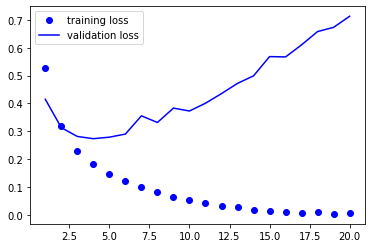

In [29]:
import matplotlib.pyplot as plt

loss_values = history_dict['loss']
validation_loss = history_dict['val_loss']
epochs = range(1, 21)

plt.plot(epochs, loss_values, 'bo', label='training loss')
plt.plot(epochs, validation_loss, 'b', label='validation loss')
plt.legend()
plt.show()

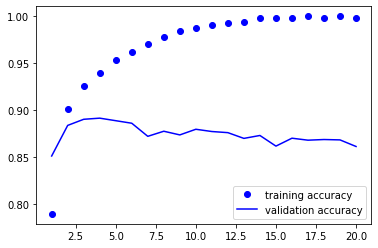

In [30]:
acc_values = history_dict['binary_accuracy']
validation_acc = history_dict['val_binary_accuracy']
epochs = range(1, 21)

plt.plot(epochs, acc_values, 'bo', label='training accuracy')
plt.plot(epochs, validation_acc, 'b', label='validation accuracy')
plt.legend()
plt.show()

In [31]:
from keras import layers
from keras import models
model = models.Sequential()

model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))
          
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics = ['accuracy'])

model.fit(x_train, y_train, batch_size=512, epochs=4) # 25000/512 == 49 batches, epoch = 4 (four iterations)

Epoch 1/4
49/49 [==============================] - 2s 30ms/step - loss: 0.4491 - accuracy: 0.8196
Epoch 2/4
49/49 [==============================] - 1s 29ms/step - loss: 0.2541 - accuracy: 0.9109
Epoch 3/4
49/49 [==============================] - 1s 29ms/step - loss: 0.1989 - accuracy: 0.9277
Epoch 4/4
49/49 [==============================] - 1s 28ms/step - loss: 0.1657 - accuracy: 0.9416


In [32]:
x_train.shape

(25000, 10000)

In [33]:
y_train.shape

(25000,)

In [34]:
result = model.evaluate(x_test, y_test)

782/782 [==============================] - 4s 5ms/step - loss: 0.2961 - accuracy: 0.8820


In [35]:
result

[0.29613861441612244, 0.8820400238037109]

In [ ]:
model.predict